# ColdGas Mass Function

In [7]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline
matplotlib.rc('font',size=20)

In [8]:
# Parameters
outputDir='../../../output/Hen15/'
#outputDir='../../../output/Hen15_betaprof_fixinfall/'
obsDir='../../../../Obsdata/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
maxFile=512
# Bins for hostogram and plotting
binperdex=10
xrange=np.array([7,11])
nbin=(xrange[1]-xrange[0])*binperdex
# Simulation parameters (read from file!)
hubble=0.673
boxside=480.28  # Units Mpc/h 

In [9]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
ColdGas=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        ColdGas[iGal:iGal+nGalFile]=f[snap]['ColdGas']
        iGal+=nGalFile

nGal= 80370


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
//anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
//anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


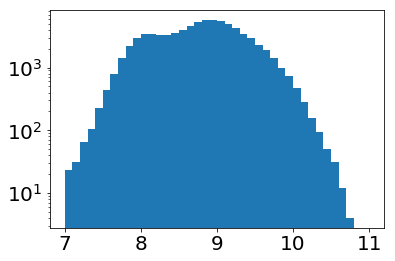

In [10]:
# Put into bins and normalise to number per unit volume (Mpc/h) per dex
nobj,bins,junk=plt.hist(np.log10(0.54*ColdGas*1e10*hubble), bins=nbin, range=xrange, log=True)
y=nobj*maxFile/((lastFile-firstFile+1)*boxside**3)*binperdex

# Plot at centre of bins
x=0.5*(bins[:-1]+bins[1:])


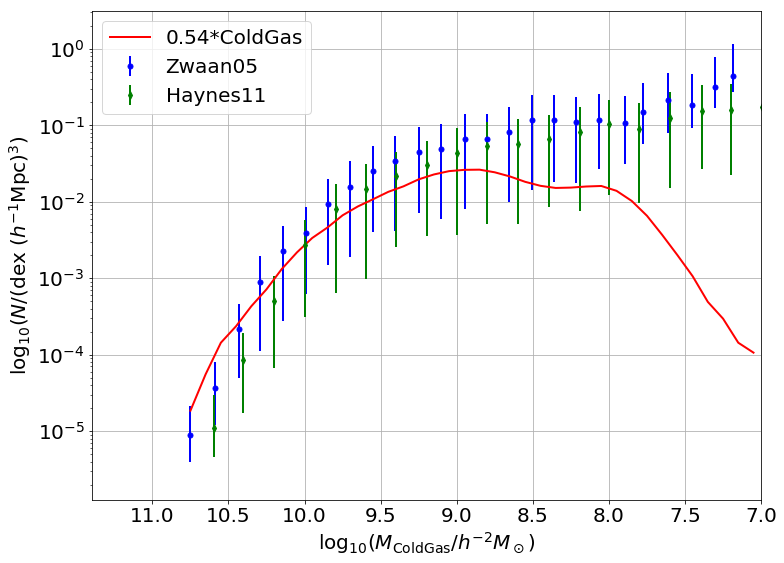

In [11]:
# Plot SMF of data
plt.figure(0,figsize=(12,9))
plt.semilogy(x,y,'-r',label='0.54*ColdGas')
plt.axis([11.4,7,10.**(-5.9),10.**0.5])
plt.xlabel(r'$\log_{10}(M_\mathrm{ColdGas}/h^{-2}M_\odot)$')
plt.ylabel(r'$\log_{10}(N/(\mathrm{dex}\ (h^{-1}\mathrm{Mpc})^3)$')
plt.grid(True)

# Plot Zwaan05 Observations
obs_hlog3=3*np.log10(0.75)
obsFile=obsDir+'zwaan2005.txt'
obs=np.loadtxt(obsFile,skiprows=1)
obs_x = obs[:,0]
obs_y = 10**(obs[:,1]-obs_hlog3)
obs_y_err = [10**(obs[:,1]+obs[:,2]-obs_hlog3),10**(obs[:,1]+obs[:,3]-obs_hlog3)]
plt.errorbar(obs_x,obs_y,yerr=obs_y_err,fmt='o', markersize=5, ecolor='blue', color='blue',label='Zwaan05')
# Plot Haynes11 observations
obs_hlog=np.log10(0.704)
obs_hlog3=3.*obs_hlog
obsFile=obsDir+'haynes2011_gmf.txt'
obs=np.loadtxt(obsFile)
obs_x = obs[:,0]+2*obs_hlog
obs_y = 10**(obs[:,1]-obs_hlog3)
obs_y_err = [10**(obs[:,1]+obs[:,2]-obs_hlog3),10**(obs[:,1]+obs[:,3]-obs_hlog3)]
plt.errorbar(obs_x,obs_y,yerr=obs_y_err,fmt='d', markersize=5, ecolor='green', color='green',label='Haynes11')

plt.legend()
plt.savefig('figs/HIMF_'+outputDir.split('/')[-2]+'.png')